In [30]:
# Add all necessary imports here
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.reload_library()
plt.style.use("ggplot")

In [31]:
from IPython.core.display import HTML
## align the output charts to the center
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)


In [32]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

### Cover Slide

# What is the problem?


<center>
<img src="img/saluslab.png" width="100%" />
</center>

# Import the necessary libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from IPython.display import display, HTML

In [34]:
sns.set_theme('notebook', style='darkgrid')
plt.style.use("ggplot")
color_palette = sns.color_palette("blend:#525252,#E9E8E4,#CB2A1D,#000", 20)
print(color_palette.as_hex())
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
    justify-content: center;
}
</style>
"""))
color_palette.as_hex()



['#525252', '#696968', '#80807f', '#999997', '#b0b0ad', '#c9c8c5', '#e0dfdb', '#e6d4cf', '#e1b7b0', '#dc9890', '#d87a71', '#d35b51', '#ce3e32', '#bf281b', '#a02117', '#7f1a12', '#60140e', '#3e0d09', '#1f0604', '#000000']


['#525252',
 '#696968',
 '#80807f',
 '#999997',
 '#b0b0ad',
 '#c9c8c5',
 '#e0dfdb',
 '#e6d4cf',
 '#e1b7b0',
 '#dc9890',
 '#d87a71',
 '#d35b51',
 '#ce3e32',
 '#bf281b',
 '#a02117',
 '#7f1a12',
 '#60140e',
 '#3e0d09',
 '#1f0604',
 '#000000']

# Read the data

In [35]:
# read all the data sets
lockbit = pd.read_csv('data/lockbit2-v5.csv')
bianlian = pd.read_csv('data/BianLian.csv')
blackbasta = pd.read_csv('data/BlackBasta-v2.csv')
playnews = pd.read_csv('data/PlayNews.csv')
royal = pd.read_csv('data/Royal.csv')
vicesociety = pd.read_csv('data/ViceSociety.csv')
# concatenate all the data sets
df_attacked = pd.concat([lockbit, bianlian, blackbasta, playnews, royal, vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_attacked.drop(['date_added', 'progress'], axis=1, inplace=True)


In [36]:
unattacked_lockbit = pd.read_csv('data/unattacked-lockbit.csv')
unattacked_bianlian = pd.read_csv('data/unattacked-bianlian.csv')
unattacked_blackbasta = pd.read_csv('data/unattacked-blackbasta.csv')
unattacked_playnews = pd.read_csv('data/unattacked-play-news.csv')
unattacked_royal = pd.read_csv('data/unattacked-royal.csv')
unattacked_vicesociety = pd.read_csv('data/unattacked-vice-society.csv')
# concatenate all the data sets
df_unattacked = pd.concat([unattacked_lockbit, unattacked_bianlian, unattacked_blackbasta, unattacked_playnews, unattacked_royal, unattacked_vicesociety], ignore_index=True)
# drop "date_added" and "progress" columns
df_unattacked.drop(['date_added', 'progress'], axis=1, inplace=True)

### Explore Divider

# Clean the data

## general cleaning (applied to the whole dataset)

In [37]:
df_attacked['ispublished'] = df_attacked['ispublished'].apply(lambda x: False if x == "0%" or x==False else True)
df_attacked['ispublished'].unique()

array([ True, False])

In [38]:
# TODO: add the code to process the revenue range, then plot it
from utils import clean_unique_values, clean_revenue_range

# get the unique values for revenue_range column
unique_values = df_attacked['revenue_range'].unique()
print(unique_values)
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)
print(clean_range)
print(formalized_values)
# apply the clean_revenue_range function to the revenue_range column
df_attacked['revenue_range'] = df_attacked['revenue_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
df_attacked['revenue_range'].unique()

[nan '200M - 1B' '> 1B' '0 - 1M' '10M - 50M' '1M - 10M' '100M - 200M'
 '50M - 100M' '$129,7M' '$516M' '$303,7M' '$19,2M' '$168M' '$5M' '$37.2M'
 '$22M' '$879M' '$5B' '$9M' '$19M' '$343 Million' '$5 Million'
 '$$653 Million' '$14' '$14M' '$669M' '$33M' '$310M' '$19' '$10M'
 '$7 Million']
[(200000000.0, 1000000000.0), (1000000000.0, inf), (0.0, 1000000.0), (10000000.0, 50000000.0), (1000000.0, 10000000.0), (100000000.0, 200000000.0), (50000000.0, 100000000.0)]
['200M - 1B', '> 1B', '0 - 1M', '10M - 50M', '1M - 10M', '100M - 200M', '50M - 100M']


array([nan, '200M - 1B', '> 1B', '0 - 1M', '10M - 50M', '1M - 10M',
       '100M - 200M', '50M - 100M'], dtype=object)

In [39]:
# TODO: Process the "employee range column"
# get the unique values for revenue_range column
unique_values = df_attacked['employees_range'].unique()
print(unique_values)
# clean 'revenue_range' column
clean_range, formalized_values = clean_unique_values(unique_values)
print(clean_range)
print(formalized_values)
# apply the clean_revenue_range function to the revenue_range column
df_attacked['employees_range'] = df_attacked['employees_range'].apply(lambda x: clean_revenue_range(x, clean_range, formalized_values))
df_attacked['employees_range'].unique()

[nan '1,000 - 5,000' '5,000 - 10,000' '1 - 10' '200 - 500' '10 - 50'
 '50 - 200' '500 - 1,000' '> 10,000' '264' '1900' '8,312' '451' '2014'
 '100' '~1000' '25' '18' '75' '2,978' '5' '2000' '41' '94' '50' '725'
 '1.559' '10' '45' '6208' '223' '259' '4,178 Employees' '126' '1420' '51'
 '43' '4' '16' '20']
[(1000.0, 5000.0), (5000.0, 10000.0), (1.0, 10.0), (200.0, 500.0), (10.0, 50.0), (50.0, 200.0), (500.0, 1000.0), (10000.0, inf)]
['1,000 - 5,000', '5,000 - 10,000', '1 - 10', '200 - 500', '10 - 50', '50 - 200', '500 - 1,000', '> 10,000']


array([nan, '1,000 - 5,000', '5,000 - 10,000', '1 - 10', '200 - 500',
       '10 - 50', '50 - 200', '500 - 1,000', '> 10,000'], dtype=object)

# specific cleaning (applied only when visualizing that column)

In [40]:
# create a copy of the data frame
df_attacked_industry = df_attacked.copy()
# drop the null values from the "industry" column
df_attacked_industry.dropna(subset=['industry'], inplace=True)

In [41]:
# create a copy of the data frame
df_attacked_revenue= df_attacked.copy()
# drop the null values from the "revenue" column
df_attacked_revenue.dropna(subset=['revenue_range'], inplace=True)

## Descriptive analysis of the data through plots

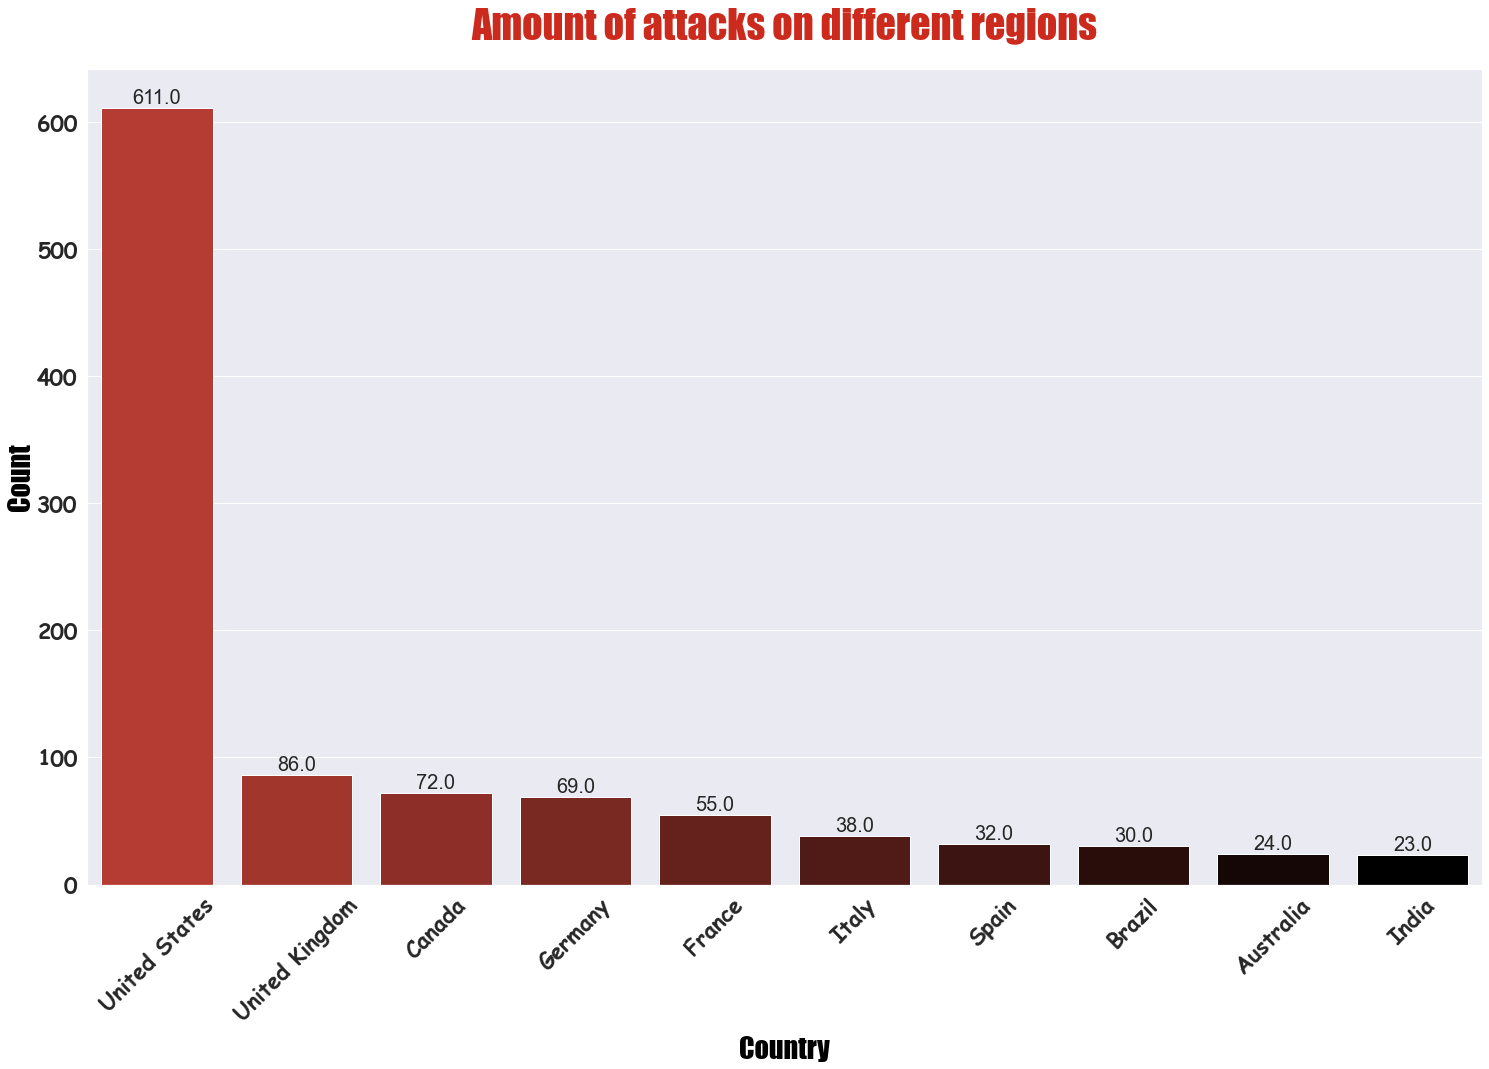

In [42]:
sns.set_theme('notebook', style='darkgrid')
# draw a count plot for the revenue range column
plt.figure(figsize=(25, 15))
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='country', data=df_attacked, order=df_attacked['country'].value_counts().iloc[:10].index, palette=color_palette)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xticks(rotation=45, fontsize=22, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=22, fontweight='bold', fontfamily='cursive')
plt.title('Amount of attacks on different regions', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Country', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Count', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'})
# add a border to the plot
# add the right padding to the plot
# save the plot
plt.savefig('img/country.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

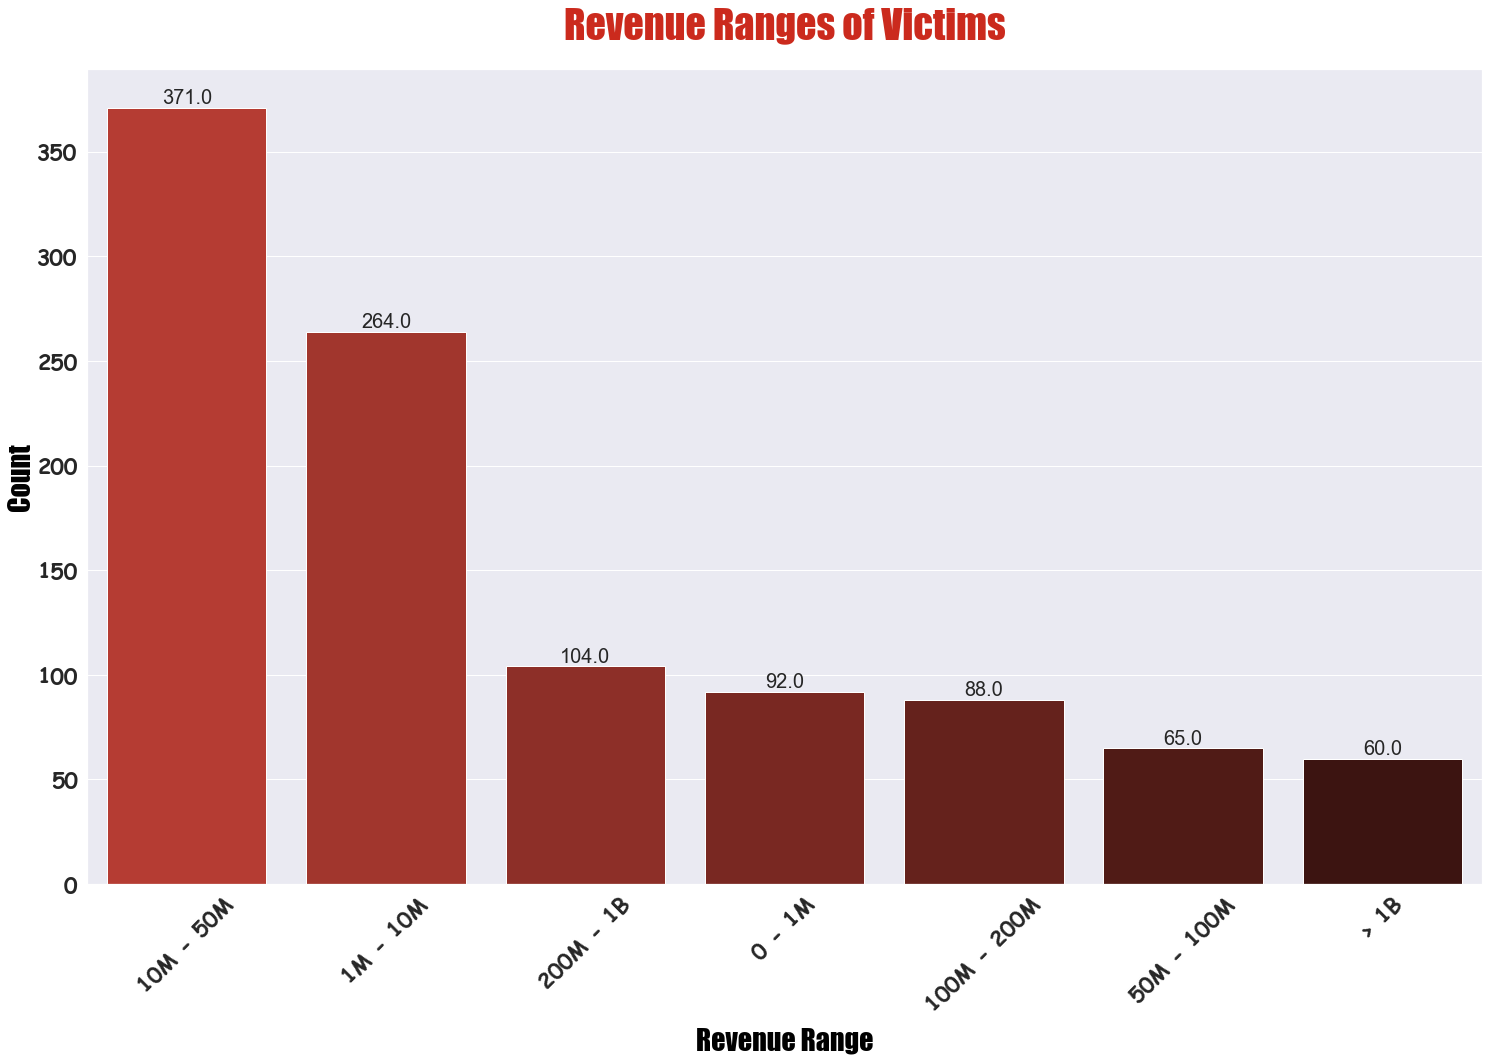

In [43]:
sns.set_theme('notebook', style='darkgrid')
# draw a count plot for the revenue range column
plt.figure(figsize=(25, 15))
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='revenue_range', data=df_attacked_revenue, order=df_attacked_revenue['revenue_range'].value_counts().index, palette=color_palette)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xticks(rotation=45, fontsize=22, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=22, fontweight='bold', fontfamily='cursive')
plt.title('Revenue Ranges of Victims', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Revenue Range', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Count', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'})
# add a border to the plot
# add the right padding to the plot
# save the plot
plt.savefig('img/revenue_range.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


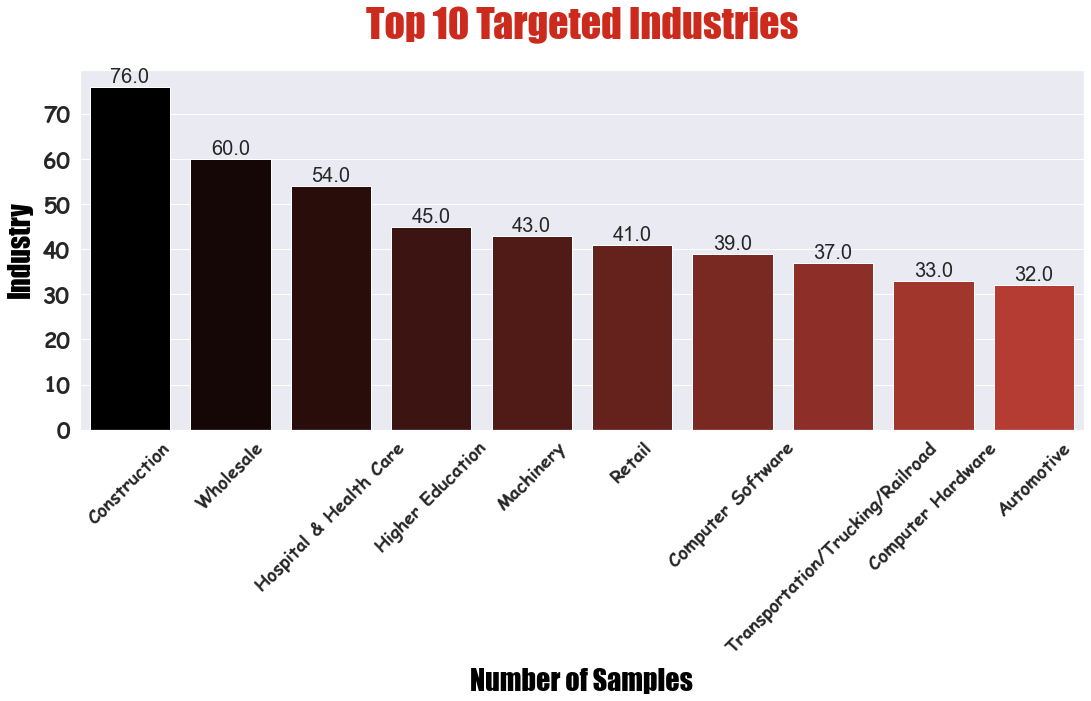

In [44]:
# plot the number of samples for top 10 industries in the data set
plt.figure(figsize=(18, 8))
# set the slides to be 60% of the height of the screen
plt.subplots_adjust(top=0.75)
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
ax = sns.countplot(x='industry', data=df_attacked_industry, order=df_attacked_industry['industry'].value_counts().iloc[:10].index, palette=color_palette[::-1])
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xticks(rotation=45, fontsize=18, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=22, fontweight='bold', fontfamily='cursive')
plt.title('Top 10 Targeted Industries', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Number of Samples', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Industry', fontdict={'fontsize': 28, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
# export the plot
plt.savefig('img/industry.png', bbox_inches='tight', pad_inches=0.5)
plt.show()

In [45]:
# get the companies whose last_seen is before today
df_attacked['last_seen'] = pd.to_datetime(df_attacked['last_seen'])
# get the day of ["last_seen"]
df_attacked['last_seen_day'] = df_attacked['last_seen'].dt.day
# get the month of ["last_seen"]
df_attacked['last_seen_month'] = df_attacked['last_seen'].dt.month
# get the year of ["last_seen"]
df_attacked['last_seen_year'] = df_attacked['last_seen'].dt.year
# get the company that paid, a company who has paid is the company whose last_seen is before the max date
date = df_attacked['last_seen'].max()
# adds a new column to the data frame that indicates whether the company paid or not
df_attacked['paid'] = df_attacked['last_seen'].apply(lambda x: False)
# get the companies that paid and set the paid column to True
df_attacked.loc[((df_attacked['last_seen_day']< date.day) & (df_attacked['last_seen_month']== date.month) )|
  (df_attacked['last_seen_month']< date.month) | (df_attacked['last_seen_year']< date.year), 'paid'] = True
  

df_attacked.head()

,_id,branches_count,company_name,company_status,content,country,deadline,description,display_name,employees_count,...,revenue,revenue_range,source,technologies_used,views,year_founded,last_seen_day,last_seen_month,last_seen_year,paid
0,645654cf7adef2f79c969d2d,0.0,joysonsafety.com,active,We took 20TB of data from the company and are ...,United States,"11 May, 2023 19:57:59 UTC",Joyson Safety Systems is a global leader in mo...,Joyson Safety Systems,NaN,...,NaN,NaN,lockbit,"[""WordPress""]",5643.0,NaN,14,5,2023,False
1,645654d37adef2f79c969d2e,4.0,layherna.com,active,Layher North America is a company that operate...,United States,"10 May, 2023 07:41:18 UTC",Layher is the world's largest producer and lea...,LAYHER INC,NaN,...,NaN,200M - 1B,lockbit,"[""Amazon Cloudfront"",""Google Tag Manager"",""Sal...",5592.0,1986.0,14,5,2023,False
2,645654e37adef2f79c969d2f,0.0,fullertonindia.com,active,"Founded in 1994 and headquartered in Mumbai, I...",India,"03 May, 2023 19:34:31 UTC",Fullerton India Credit Company Limited is regi...,Fullerton India Credit Company Limited,NaN,...,NaN,> 1B,lockbit,"[""Amazon Cloudfront"",""CloudFlare"",""Google Doub...",11187.0,1994.0,14,5,2023,False
3,645654e77adef2f79c969d30,0.0,triaflex.at,active,Welcome to TRIAFLEX\nWe design the ergonomic l...,Austria,"17 May, 2023 15:44:34 UTC",NaN,Triaflex Innovative Sitz-und Gesundheitssysteme,NaN,...,NaN,NaN,lockbit,"[""Google Analytics"",""Google Tag Manager""]",5619.0,NaN,14,5,2023,False
4,645654ea7adef2f79c969d31,0.0,cydsa.com,active,"Cydsa, S.A.B. de C.V., together its subsidiari...",Mexico,"08 May, 2023 01:15:09 UTC",Cydsa SAB de CV (Cydsa) is a Mexico-based hold...,Cydsa SAB de CV,1690,...,4.4832e+08,200M - 1B,lockbit,"[""MaxCDN"",""WordPress""]",6274.0,1945.0,14,5,2023,False


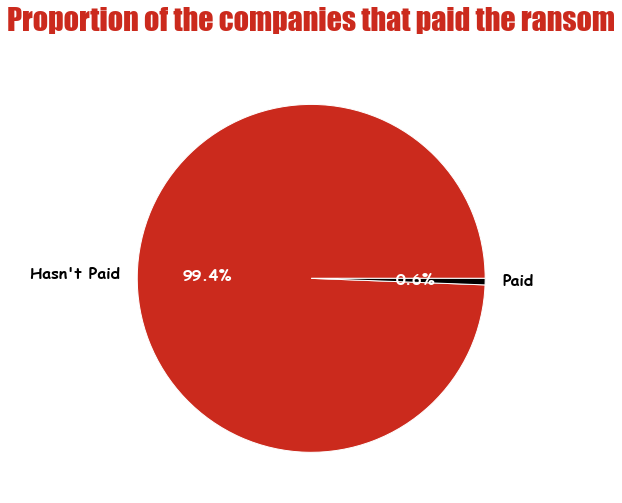

In [46]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
color_palette = sns.color_palette("blend:#CB2A1D,#000", 2)
# draw a pie chart for the ispublished column and remove the borders from it
plt.figure(figsize=(10, 8))
_, _, autotexts = plt.pie(df_attacked['paid'].value_counts(), labels=['Hasn\'t Paid', 'Paid'], autopct='%1.1f%%', colors=color_palette, textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'cursive', 'color': 'black' }, wedgeprops={'linewidth': 1})
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Proportion of the companies that paid the ransom', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30)
plt.show()

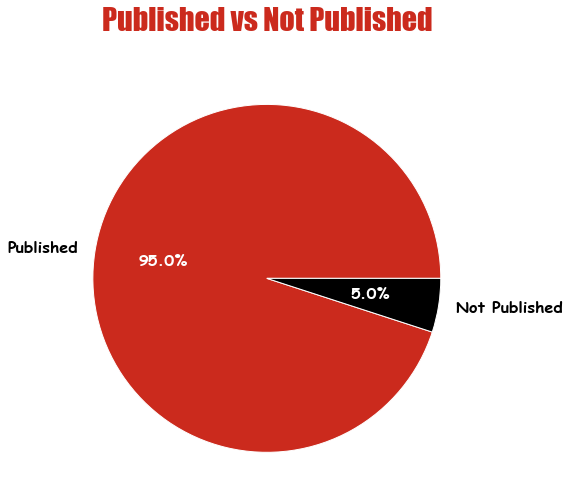

In [47]:
# plot bar plot for ispublished column and display the count for each category on the top of the bar
color_palette = sns.color_palette("blend:#CB2A1D,#000", 2)
# draw a pie chart for the ispublished column and remove the borders from it
plt.figure(figsize=(10, 8))
_, _, autotexts = plt.pie(df_attacked['ispublished'].value_counts(), labels=['Published', 'Not Published'], autopct='%1.1f%%', colors=color_palette, textprops={'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'cursive', 'color': 'black' }, wedgeprops={'linewidth': 1})
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Published vs Not Published', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30)
plt.show()

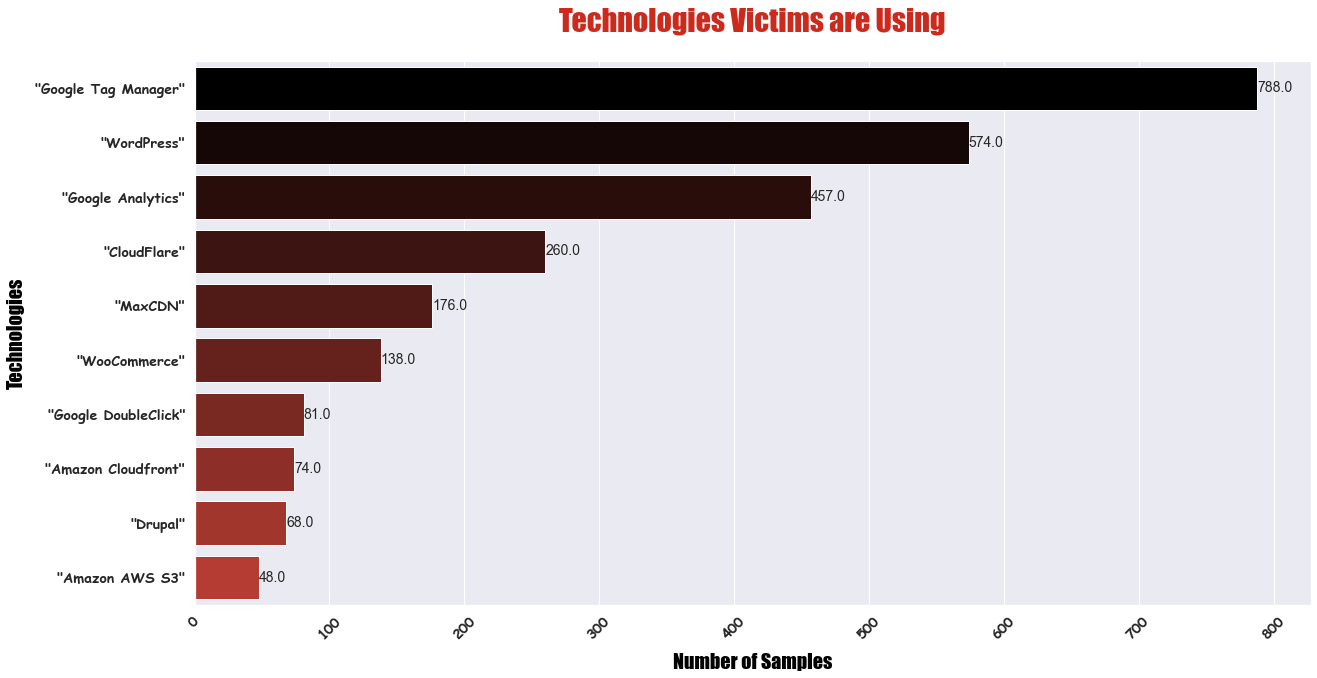

In [48]:
# count the number of empty lists in the `technologies_used` column
# count nulls first
df_attacked_technologies = df_attacked.copy()
col = df_attacked_technologies['technologies_used'].dropna()
# count empty lists
new_col = col.apply(lambda x:  1 if len(x)== 2 else 0)
col2= df_attacked.copy()
# drop nulls in the `technologies_used` column
col2.dropna(subset=['technologies_used'], inplace=True)
new_col2 = col2[col2["technologies_used"]!="[]"]
techs = new_col2['technologies_used'].apply(lambda x: x[1:-1].split(','))
#count each technology
techs = techs.explode()
# plot the top 10 technologies used by companies
color_palette = sns.color_palette("blend:#CB2A1D,#000", 10)
plt.figure(figsize=(20, 10))
ax = sns.countplot(y=techs, order=techs.value_counts().iloc[:10].index, palette=color_palette[::-1])
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=14)
plt.xticks(rotation=45, fontsize=14, fontweight='bold', fontfamily='cursive')
plt.yticks(fontsize=14, fontweight='bold', fontfamily='cursive')
plt.title('Technologies Victims are Using', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#CB2A1D', 'fontfamily': 'fantasy'}, pad=30, )
plt.xlabel('Number of Samples', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.ylabel('Technologies', fontdict={'fontsize': 20, 'fontweight': 'medium', 'color': '#000', 'fontfamily': 'fantasy'}, labelpad=10)
plt.show()


### Predictive analysis Divider

In [49]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [50]:
df_attacked_cleaned = pd.read_csv("../../cleaned_attacked_data.csv")
df_unattacked_cleaned = pd.read_csv("../../cleaned_unattacked_data.csv")

In [51]:
# sources ['BianLian', 'Play News', 'Royal', 'Vice Society', 'black basta', 'lockbit']


In [77]:
# use logistic regression to predict if the company will be attacked or not
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
sources = ['BianLian', 'Play News', 'Royal', 'Vice Society', 'black basta', 'lockbit']
scores_df = pd.DataFrame(columns=["source", "precision", "recall", "f1_score", "support"])  
weights_df = pd.DataFrame(columns=X_train.columns)  

classification_reports = []
for i in range (0, 6):
    df_attacked_fill_missings = df_attacked_cleaned.copy()
    df_unattacked_fill_missings = df_unattacked_cleaned.copy()
    # compine the attacked and unattacked data
    df_attacked_fill_missings['attacked'] = 1
    df_unattacked_fill_missings['attacked'] = 0
    # split the rows with source =  1 into new dataframe
    df_attacked_play_news_test = df_attacked_fill_missings[df_attacked_fill_missings['source'] == i]
    # randomly split the unaffected companies into train and test
    df_unattacked_train, df_unattacked_test = train_test_split(df_unattacked_fill_missings, test_size=0.2, random_state=42)
    # concatenate the two dataframes
    df_attacked_unattacked_test = pd.concat([df_attacked_play_news_test, df_unattacked_test], ignore_index=True)
    # drop rows with source = 1 from the original dataframe
    df_attacked_fill_missings_train = df_attacked_fill_missings[df_attacked_fill_missings['source'] != i]
    # concatenate the two dataframes
    df_attacked_unattacked_train = pd.concat([df_attacked_fill_missings_train, df_unattacked_train], ignore_index=True)
    y_train = df_attacked_unattacked_train['attacked']
    y_test = df_attacked_unattacked_test['attacked']
    X_train = df_attacked_unattacked_train.drop(['attacked', 'source'], axis=1)
    X_test = df_attacked_unattacked_test.drop(['attacked', 'source'], axis=1)
    # fit the logistic regression model
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    # get the weights of the features
    weights = logistic_regression.coef_
    # get the intercept
    intercept = logistic_regression.intercept_
    # append the weights to the dataframe
    weights_df.loc[i] = weights[0]
            
    # predict the test data
    y_pred = logistic_regression.predict(X_test)
    classification_reports.append(classification_report(y_test, y_pred, output_dict=True))

# separate each metric in the classification report into a column in the dataframe
precision = []
recall = []
f1_score = []
support = []
for i in range(0, 6):
    precision.append(classification_reports[i]['1']['precision'])
    recall.append(classification_reports[i]['1']['recall'])
    f1_score.append(classification_reports[i]['1']['f1-score'])
    support.append(classification_reports[i]['1']['support'])
# add the columns to the dataframe
scores_df['precision'] = precision
scores_df['recall'] = recall
scores_df['f1_score'] = f1_score
scores_df['support'] = support
# # add the index to the dataframe
scores_df['source'] = sources

scores_df


,source,precision,recall,f1_score,support
0,BianLian,0.969925,0.984733,0.977273,131
1,Play News,0.962500,0.962500,0.962500,80
2,Royal,0.956790,1.000000,0.977918,155
3,Vice Society,0.985816,0.939189,0.961938,148
4,black basta,0.981818,0.977376,0.979592,221
5,lockbit,1.000000,0.934820,0.966312,583


* Note that the test data was totally new to the model as it came from a completely different source *gang website* from that of the training data.

* Ragardless of the source of the testing data, the model always performed well.


In [78]:
weights_df

,country,branches_count,revenue_range,employees_range,industry,year_founded
0,-0.004951,-0.422343,1.786242,2.567783,-0.495007,0.002010
1,-0.004327,-0.287753,2.511917,1.318638,-0.719842,0.001607
2,-0.003472,-0.489057,2.421416,1.379112,-0.578737,0.001707
3,-0.004040,-0.485960,2.718034,1.346499,-0.710960,0.001720
4,-0.006528,-0.364903,1.955745,2.728930,-0.582111,0.002149
5,-0.014193,-0.654338,2.705805,1.464209,-0.589403,0.001696


* From the coefficients values shown in the above table, we can see that `revenue`, `employee_range` and industry sre the most affecting features, and that behaviour is the same for all gangs.

In [82]:
# sources ['BianLian', 'Play News', 'Royal', 'Vice Society', 'black basta', 'lockbit']
# use random forest to predict what is the source of company if it will be attacked
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df_attacked_cleaned = pd.read_csv("../../cleaned_attacked_data.csv")
df_unattacked_cleaned = pd.read_csv("../../cleaned_unattacked_data.csv")
df_attacked_fill_missings = df_attacked_cleaned.copy()
df_unattacked_fill_missings = df_unattacked_cleaned.copy()
df_unattacked_fill_missings['attacked'] = 0
df_attacked_fill_missings['attacked'] = 1
# split the data into train and test
y = df_attacked_fill_missings['source']
X = df_attacked_fill_missings.drop(['source', 'attacked'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_attacked_fill_missings['source'])
# fit the random forest model
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train, y_train)
# predict the test data
y_pred = random_forest.predict(X_test)
# print the accuracy score
#print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
# print the confusion matrix
#print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
# print the classification report
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.00      0.00      0.00        16
         2.0       0.16      0.10      0.12        31
         3.0       0.45      0.30      0.36        30
         4.0       0.32      0.27      0.29        44
         5.0       0.51      0.76      0.61       117

    accuracy                           0.43       264
   macro avg       0.24      0.24      0.23       264
weighted avg       0.35      0.43      0.37       264



* The results are very bad, but this is not surprising as we showed in the previous predictive analysis that the gangs are very similar and currently we don't have enough data to distinguish between them.
* This is one of the limitations due to crawling, and we consider it as a future work.

* By applying Chi-Square test:

|              |    USA    |    Europe    |
|:------------:|:---------:|:------------:|
|  attacked    |    339    |     154      |
| not attacked |    263    |     55       |

* The **p-value** is *1.3632153665534083e-05 <.05* which proves that there is a relationship between the two variables.

### Q&A Slide